<a href="https://colab.research.google.com/github/viniscera/Topicos_Especiais_Em_Engenharia_Economica/blob/main/Vinicius_Silva_Pereira_atividade_aula_pratica03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística dos retornos

## Instalando e importando as bibliotecas necessárias (Não Modificar)

In [ ]:
!pip install -U pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

## Estatística dos retornos da Ação 1 - AMBEV S/A

Preenchendo os dados da ação:

In [ ]:
ticker = 'ABEV3.SA' # É importante o ".SA" no final do código da ação
nome = 'AMBEV S/A'
data_inicial = '2020-04-01'
data_final = '2021-04-30'

Realizando o pré processamento

In [ ]:
acao = pdr.data.get_data_yahoo(ticker, start= data_inicial, end= data_final)
acao = acao.rename({"Close": nome}, axis=1)
acao = acao[[nome]]

Cálculo dos retornos

In [ ]:
retornos = acao.pct_change()
retornos = retornos.dropna()

Visualização dos dados

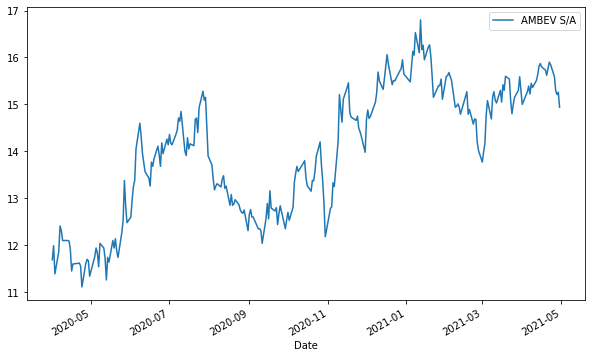

In [ ]:
acao.plot(figsize=(10,6));

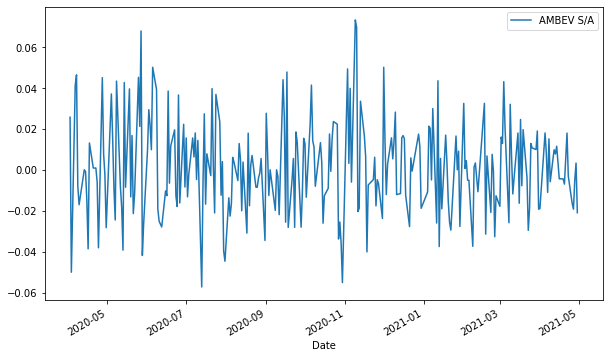

In [ ]:
retornos.plot(figsize=(10,6));

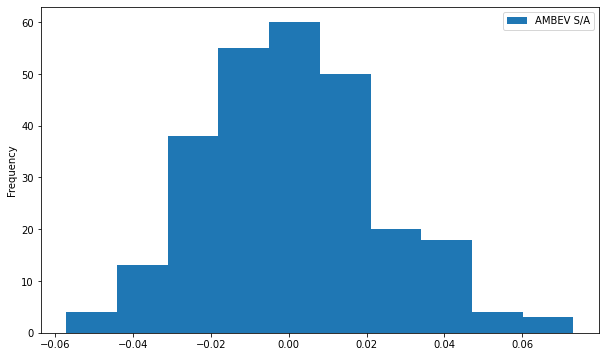

In [ ]:
retornos.plot.hist(figsize=(10,6));

Estatística descritiva

In [ ]:
retornos.describe()

,AMBEV S/A
count,265.000000
mean,0.001189
std,0.023026
min,-0.057239
25%,-0.014888
50%,0.000000
75%,0.015559
max,0.073208


Assimetria e curtose

In [ ]:
# Cálculo da assimetria:
skew(retornos)

array([0.30995722])

In [ ]:
# Cálculo da curtose:
kurtosis(retornos)

array([0.10807895])

Testes "visuais" de normalidade

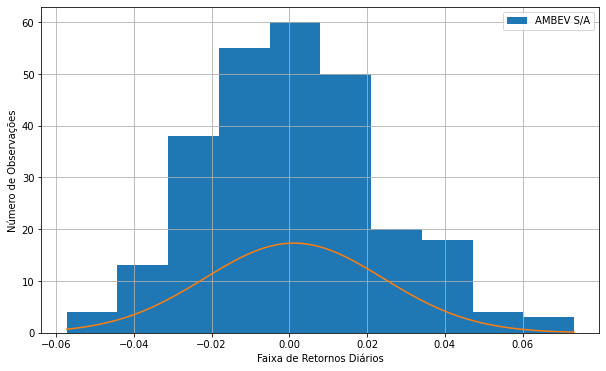

In [ ]:
# Histograma comparando com uma distribuição normal de mesma média e desvio padrão:
retornos.plot.hist(figsize=(10,6));
# parâmetros para curva normal
mediaR = retornos.mean()
desvpadR = retornos.std()
minR = retornos.min()
maxR = retornos.max()
x = np.linspace(minR,maxR,100)
plt.plot(x, stats.norm.pdf(x,mediaR,desvpadR))
plt.grid(True)
plt.xlabel('Faixa de Retornos Diários')
plt.ylabel('Número de Observações')
plt.show()

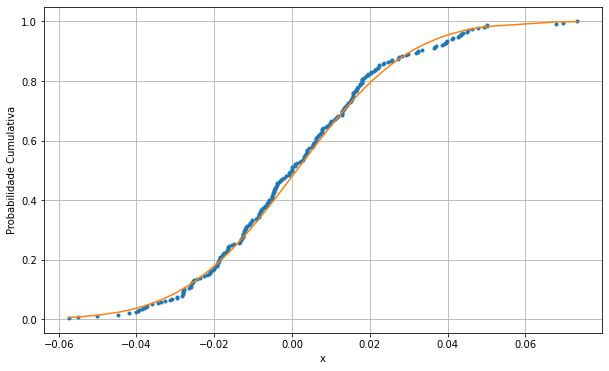

In [ ]:
# Distribuição cumulativa
plt.figure(figsize=(10,6))
x = retornos[nome].sort_values().values
y = np.arange(1, len(x)+1)/float(len(x))
mediaR = np.mean(x)
desvpadR = np.std(x)
y1 = stats.norm.cdf((x-mediaR)/desvpadR)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Probabilidade Cumulativa')
plt.show()

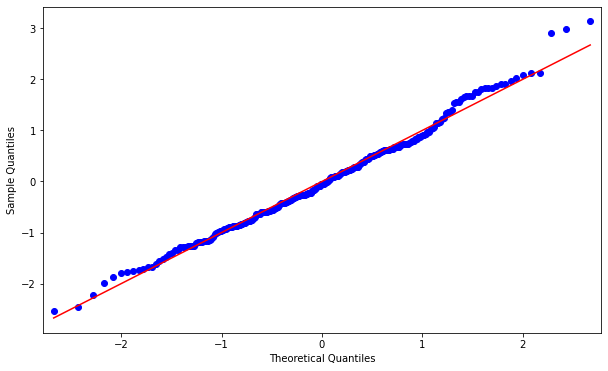

In [ ]:
# Q-Q Plot (linha de Henry)
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(retornos[nome].values, line='s', dist = stats.norm, fit = True, ax=ax)
plt.show()

Teste quantitativo de normalidade de Shapro-Wilk

In [ ]:
# Este teste tem como hipótese nula que a amostra possui uma distribuição normal. 
# Caso o valor p < 0.05 a hipótese nula é rejeitada significando que os dados da amostra não são normalmente distribuído
shapirowilk = shapiro(retornos)
if shapirowilk[1] <= 0.05:
  print("Hipotese Nula Rejeitada")
else:
  print("Não rejeitar hipotese nula") #minha amostra possui uma distribuição normal

print('O valor-p calculado foi de', shapirowilk[1])

Não rejeitar hipotese nula
O valor-p calculado foi de 0.09879318624734879


## Estatística dos retornos da Ação 2 - JBS

Preenchendo os dados da ação:

In [ ]:
ticker = 'JBSS3.SA' # É importante o ".SA" no final do código da ação
nome = 'JBS'
data_inicial = '2018-01-01'
data_final = '2018-10-31'

Realizando o pré processamento

In [ ]:
acao = pdr.data.get_data_yahoo(ticker, start= data_inicial, end= data_final)
acao = acao.rename({"Close": nome}, axis=1)
acao = acao[[nome]]

Cálculo dos retornos

In [ ]:
retornos = acao.pct_change()
retornos = retornos.dropna()

Visualização dos dados

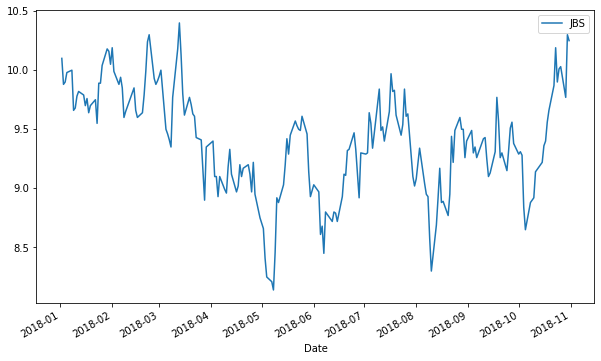

In [ ]:
acao.plot(figsize=(10,6));

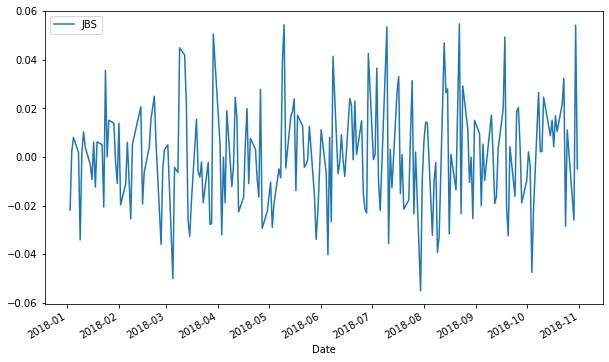

In [ ]:
retornos.plot(figsize=(10,6));

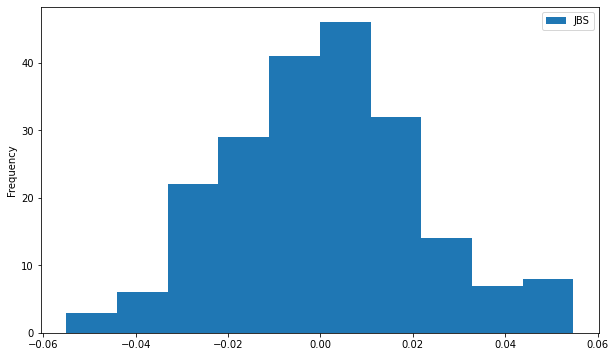

In [ ]:
retornos.plot.hist(figsize=(10,6));

Estatística descritiva

In [ ]:
retornos.describe()

,JBS
count,208.000000
mean,0.000301
std,0.021525
min,-0.055036
25%,-0.015739
50%,0.000509
75%,0.014489
max,0.054749


Assimetria e curtose

In [ ]:
# Cálculo da assimetria:
skew(retornos)

array([0.24469366])

In [ ]:
# Cálculo da curtose:
kurtosis(retornos)

array([-0.04210258])

Testes "visuais" de normalidade

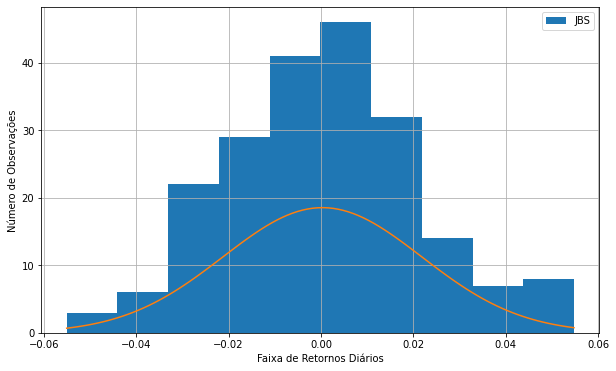

In [ ]:
# Histograma comparando com uma distribuição normal de mesma média e desvio padrão:
retornos.plot.hist(figsize=(10,6));
# parâmetros para curva normal
mediaR = retornos.mean()
desvpadR = retornos.std()
minR = retornos.min()
maxR = retornos.max()
x = np.linspace(minR,maxR,100)
plt.plot(x, stats.norm.pdf(x,mediaR,desvpadR))
plt.grid(True)
plt.xlabel('Faixa de Retornos Diários')
plt.ylabel('Número de Observações')
plt.show()

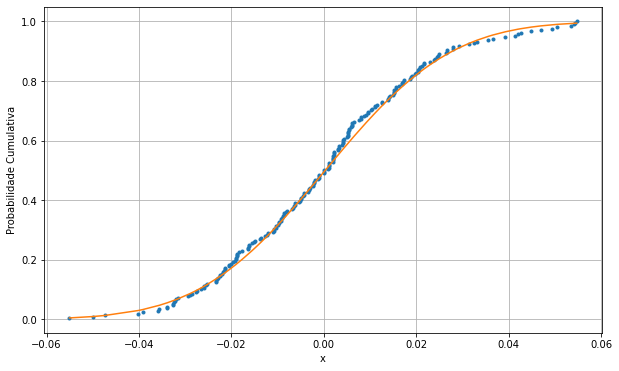

In [ ]:
# Distribuição cumulativa
plt.figure(figsize=(10,6))
x = retornos[nome].sort_values().values
y = np.arange(1, len(x)+1)/float(len(x))
mediaR = np.mean(x)
desvpadR = np.std(x)
y1 = stats.norm.cdf((x-mediaR)/desvpadR)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Probabilidade Cumulativa')
plt.show()

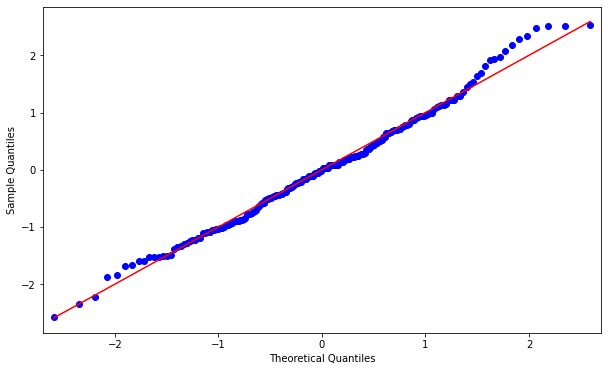

In [ ]:
# Q-Q Plot (linha de Henry)
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(retornos[nome].values, line='s', dist = stats.norm, fit = True, ax=ax)
plt.show()

Teste quantitativo de normalidade de Shapro-Wilk

In [ ]:
# Este teste tem como hipótese nula que a amostra possui uma distribuição normal. 
# Caso o valor p < 0.05 a hipótese nula é rejeitada significando que os dados da amostra não são normalmente distribuídos
shapirowilk = shapiro(retornos)
if shapirowilk[1] <= 0.05:
  print("Hipotese Nula Rejeitada")
else:
  print("Não rejeitar hipotese nula") #minha amostra possui uma distribuição normal

print('O valor-p calculado foi de', shapirowilk[1])

Não rejeitar hipotese nula
O valor-p calculado foi de 0.19543543457984924


## Estatística dos retornos da Ação 3 - LOCALIZA

Preenchendo os dados da ação:

In [ ]:
ticker = 'RENT3.SA' # É importante o ".SA" no final do código da ação
nome = 'LOCALIZA'
data_inicial = '2020-10-01'
data_final = '2021-03-31'

Realizando o pré processamento

In [ ]:
acao = pdr.data.get_data_yahoo(ticker, start= data_inicial, end= data_final)
acao = acao.rename({"Close": nome}, axis=1)
acao = acao[[nome]]

Cálculo dos retornos

In [ ]:
retornos = acao.pct_change()
retornos = retornos.dropna()

Visualização dos dados

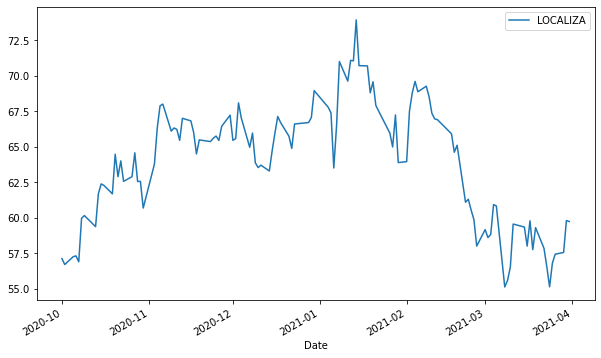

In [ ]:
acao.plot(figsize=(10,6));

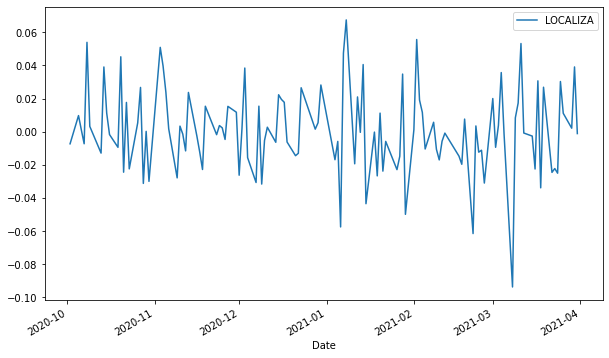

In [ ]:
retornos.plot(figsize=(10,6));

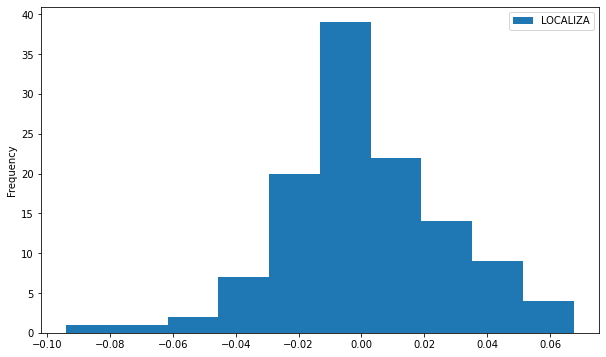

In [ ]:
retornos.plot.hist(figsize=(10,6));

Estatística descritiva

In [ ]:
retornos.describe()

,LOCALIZA
count,119.000000
mean,0.000706
std,0.025790
min,-0.093868
25%,-0.014669
50%,-0.000422
75%,0.016333
max,0.067509


Assimetria e curtose

In [ ]:
# Cálculo da assimetria:
skew(retornos)

array([-0.14415875])

In [ ]:
# Cálculo da curtose:
kurtosis(retornos)

array([1.02817183])

Testes "visuais" de normalidade

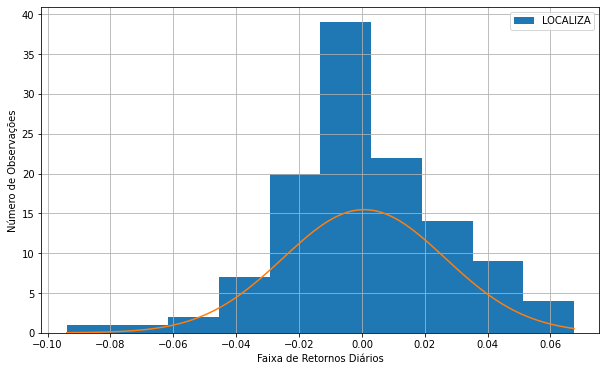

In [ ]:
# Histograma comparando com uma distribuição normal de mesma média e desvio padrão:
retornos.plot.hist(figsize=(10,6));
# parâmetros para curva normal
mediaR = retornos.mean()
desvpadR = retornos.std()
minR = retornos.min()
maxR = retornos.max()
x = np.linspace(minR,maxR,100)
plt.plot(x, stats.norm.pdf(x,mediaR,desvpadR))
plt.grid(True)
plt.xlabel('Faixa de Retornos Diários')
plt.ylabel('Número de Observações')
plt.show()

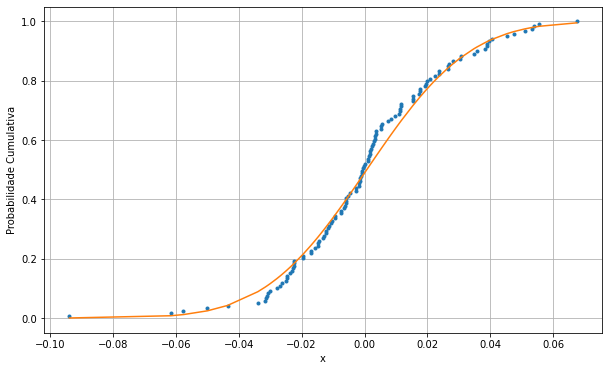

In [ ]:
# Distribuição cumulativa
plt.figure(figsize=(10,6))
x = retornos[nome].sort_values().values
y = np.arange(1, len(x)+1)/float(len(x))
mediaR = np.mean(x)
desvpadR = np.std(x)
y1 = stats.norm.cdf((x-mediaR)/desvpadR)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Probabilidade Cumulativa')
plt.show()

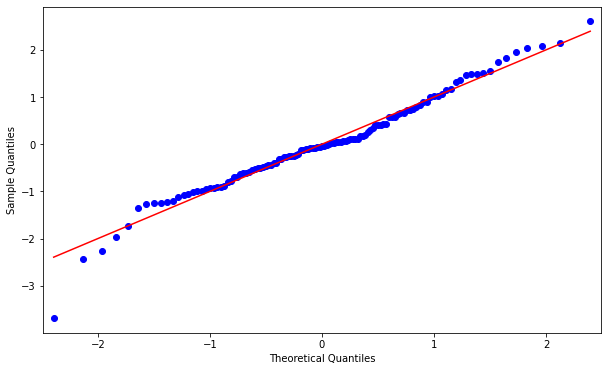

In [ ]:
# Q-Q Plot (linha de Henry)
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(retornos[nome].values, line='s', dist = stats.norm, fit = True, ax=ax)
plt.show()

Teste quantitativo de normalidade de Shapro-Wilk

In [ ]:
# Este teste tem como hipótese nula que a amostra possui uma distribuição normal. 
# Caso o valor p < 0.05 a hipótese nula é rejeitada significando que os dados da amostra não são normalmente distribuídos
shapirowilk = shapiro(retornos)
if shapirowilk[1] <= 0.05:
  print("Hipotese Nula Rejeitada")
else:
  print("Não rejeitar hipotese nula") #minha amostra possui uma distribuição normal

print('O valor-p calculado foi de', shapirowilk[1])

Não rejeitar hipotese nula
O valor-p calculado foi de 0.08357232809066772


## Estatística dos retornos da Ação 4 - MAGAZ LUIZA


Preenchendo os dados da ação:

In [ ]:
ticker = 'MGLU3.SA' # É importante o ".SA" no final do código da ação
nome = 'MAGAZ LUIZA'
data_inicial = '2014-06-01'
data_final = '2014-08-22'

Realizando o pré processamento

In [ ]:
acao = pdr.data.get_data_yahoo(ticker, start= data_inicial, end= data_final)
acao = acao.rename({"Close": nome}, axis=1)
acao = acao[[nome]]

Cálculo dos retornos

In [ ]:
retornos = acao.pct_change()
retornos = retornos.dropna()

Visualização dos dados

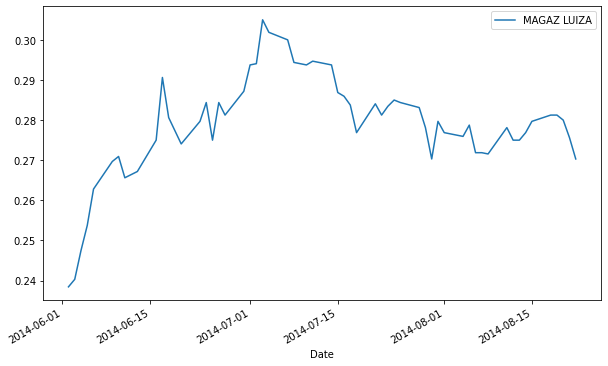

In [ ]:
acao.plot(figsize=(10,6));

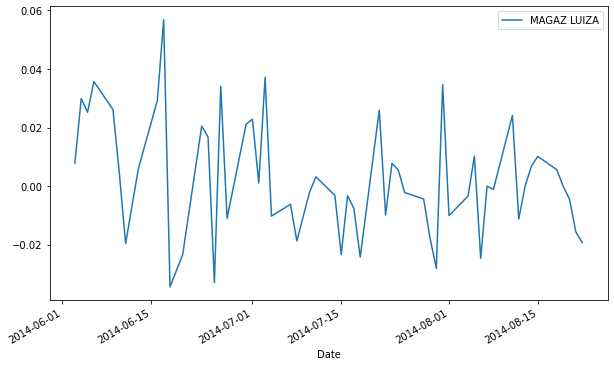

In [ ]:
retornos.plot(figsize=(10,6));

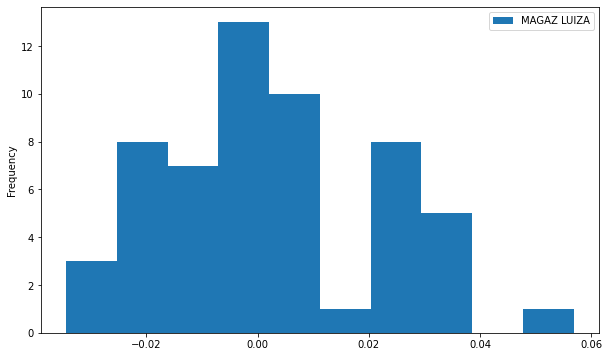

In [ ]:
retornos.plot.hist(figsize=(10,6));

Estatística descritiva

In [ ]:
retornos.describe()

,MAGAZ LUIZA
count,56.000000
mean,0.002440
std,0.020076
min,-0.034409
25%,-0.010432
50%,0.000000
75%,0.017702
max,0.056818


Assimetria e curtose

In [ ]:
# Cálculo da assimetria:
skew(retornos)

array([0.37155761])

In [ ]:
# Cálculo da curtose:
kurtosis(retornos)

array([-0.32356718])

Testes "visuais" de normalidade

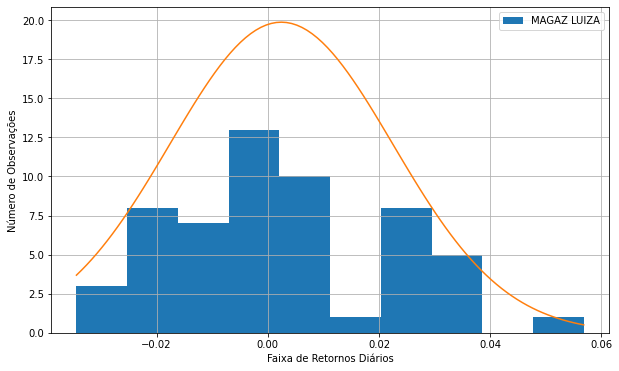

In [ ]:
# Histograma comparando com uma distribuição normal de mesma média e desvio padrão:
retornos.plot.hist(figsize=(10,6));
# parâmetros para curva normal
mediaR = retornos.mean()
desvpadR = retornos.std()
minR = retornos.min()
maxR = retornos.max()
x = np.linspace(minR,maxR,100)
plt.plot(x, stats.norm.pdf(x,mediaR,desvpadR))
plt.grid(True)
plt.xlabel('Faixa de Retornos Diários')
plt.ylabel('Número de Observações')
plt.show()

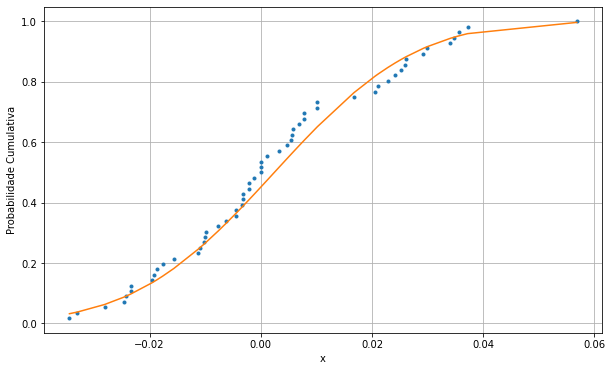

In [ ]:
# Distribuição cumulativa
plt.figure(figsize=(10,6))
x = retornos[nome].sort_values().values
y = np.arange(1, len(x)+1)/float(len(x))
mediaR = np.mean(x)
desvpadR = np.std(x)
y1 = stats.norm.cdf((x-mediaR)/desvpadR)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Probabilidade Cumulativa')
plt.show()

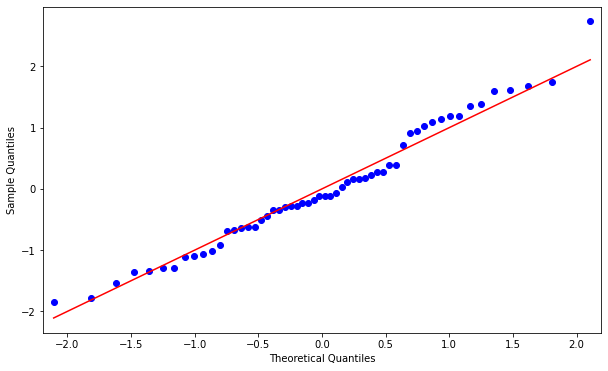

In [ ]:
# Q-Q Plot (linha de Henry)
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(retornos[nome].values, line='s', dist = stats.norm, fit = True, ax=ax)
plt.show()

Teste quantitativo de normalidade de Shapro-Wilk

In [ ]:
# Este teste tem como hipótese nula que a amostra possui uma distribuição normal. 
# Caso o valor p < 0.05 a hipótese nula é rejeitada significando que os dados da amostra não são normalmente distribuídos
shapirowilk = shapiro(retornos)
if shapirowilk[1] <= 0.05:
  print("Hipotese Nula Rejeitada")
else:
  print("Não rejeitar hipotese nula") #minha amostra possui uma distribuição normal

print('O valor-p calculado foi de', shapirowilk[1])

Não rejeitar hipotese nula
O valor-p calculado foi de 0.3152419924736023


## Estatística dos retornos da Ação 5 - SANTANDER BR





Preenchendo os dados da ação:

In [ ]:
ticker = 'SANB11.SA' # É importante o ".SA" no final do código da ação
nome = 'SANTANDER BT'
data_inicial = '2022-09-01'
data_final = '2022-09-30'

Realizando o pré processamento

In [ ]:
acao = pdr.data.get_data_yahoo(ticker, start= data_inicial, end= data_final)
acao = acao.rename({"Close": nome}, axis=1)
acao = acao[[nome]]

Cálculo dos retornos

In [ ]:
retornos = acao.pct_change()
retornos = retornos.dropna()

Visualização dos dados

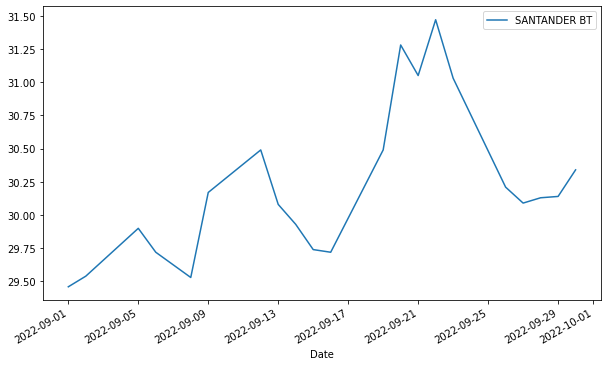

In [ ]:
acao.plot(figsize=(10,6));

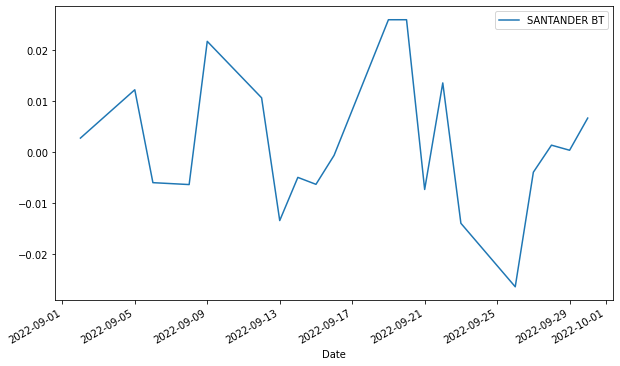

In [ ]:
retornos.plot(figsize=(10,6));

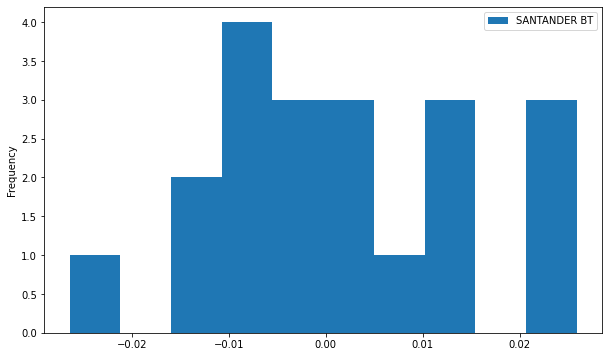

In [ ]:
retornos.plot.hist(figsize=(10,6));

Estatística descritiva

In [ ]:
retornos.describe()

,SANTANDER BT
count,20.000000
mean,0.001561
std,0.013665
min,-0.026426
25%,-0.006359
50%,-0.000170
75%,0.011002
max,0.025910


Assimetria e curtose

In [ ]:
# Cálculo da assimetria:
skew(retornos)

array([0.19310943])

In [ ]:
# Cálculo da curtose:
kurtosis(retornos)

array([-0.37845508])

Testes "visuais" de normalidade

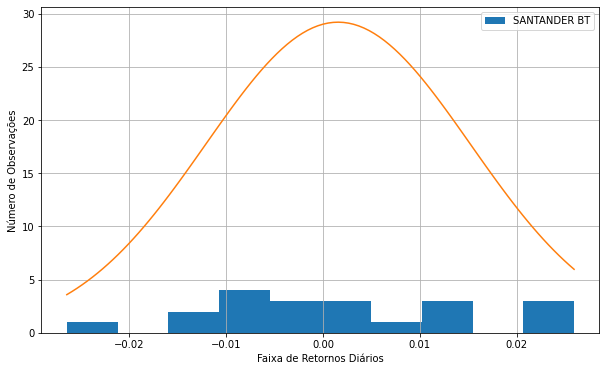

In [ ]:
# Histograma comparando com uma distribuição normal de mesma média e desvio padrão:
retornos.plot.hist(figsize=(10,6));
# parâmetros para curva normal
mediaR = retornos.mean()
desvpadR = retornos.std()
minR = retornos.min()
maxR = retornos.max()
x = np.linspace(minR,maxR,100)
plt.plot(x, stats.norm.pdf(x,mediaR,desvpadR))
plt.grid(True)
plt.xlabel('Faixa de Retornos Diários')
plt.ylabel('Número de Observações')
plt.show()

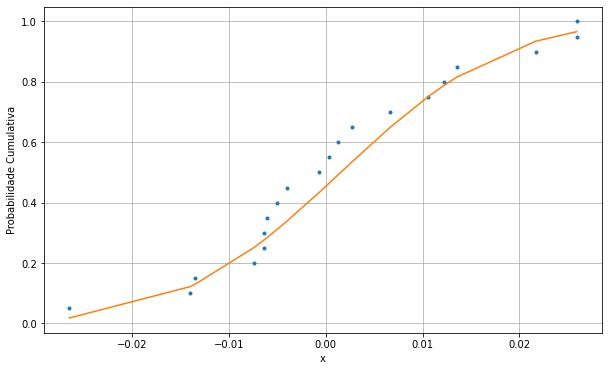

In [ ]:
# Distribuição cumulativa
plt.figure(figsize=(10,6))
x = retornos[nome].sort_values().values
y = np.arange(1, len(x)+1)/float(len(x))
mediaR = np.mean(x)
desvpadR = np.std(x)
y1 = stats.norm.cdf((x-mediaR)/desvpadR)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Probabilidade Cumulativa')
plt.show()

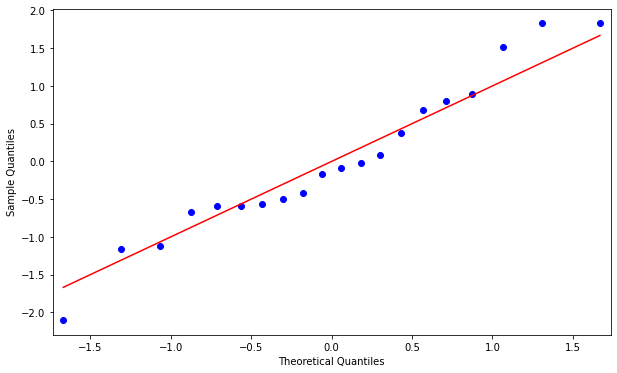

In [ ]:
# Q-Q Plot (linha de Henry)
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(retornos[nome].values, line='s', dist = stats.norm, fit = True, ax=ax)
plt.show()

Teste quantitativo de normalidade de Shapro-Wilk

In [ ]:
# Este teste tem como hipótese nula que a amostra possui uma distribuição normal. 
# Caso o valor p < 0.05 a hipótese nula é rejeitada significando que os dados da amostra não são normalmente distribuídos
shapirowilk = shapiro(retornos)
if shapirowilk[1] <= 0.05:
  print("Hipotese Nula Rejeitada")
else:
  print("Não rejeitar hipotese nula") #minha amostra possui uma distribuição normal

print('O valor-p calculado foi de', shapirowilk[1])

Não rejeitar hipotese nula
O valor-p calculado foi de 0.5736470818519592


## Estatística dos retornos da Ação 6 - TOTVS





Preenchendo os dados da ação:

In [ ]:
ticker = 'TOTS3.SA' # É importante o ".SA" no final do código da ação
nome = 'TOTVS'
data_inicial = '2022-02-10'
data_final = '2022-05-03'

Realizando o pré processamento

In [ ]:
acao = pdr.data.get_data_yahoo(ticker, start= data_inicial, end= data_final)
acao = acao.rename({"Close": nome}, axis=1)
acao = acao[[nome]]

Cálculo dos retornos

In [ ]:
retornos = acao.pct_change()
retornos = retornos.dropna()

Visualização dos dados

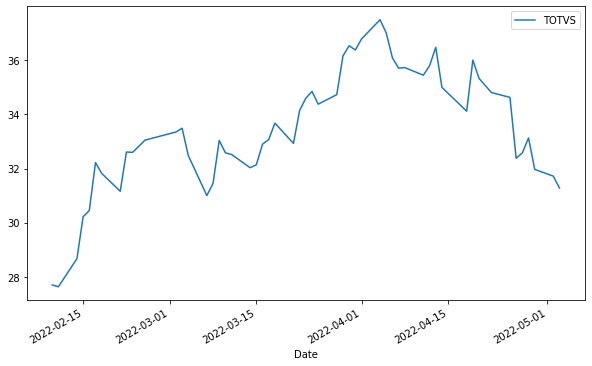

In [ ]:
acao.plot(figsize=(10,6));

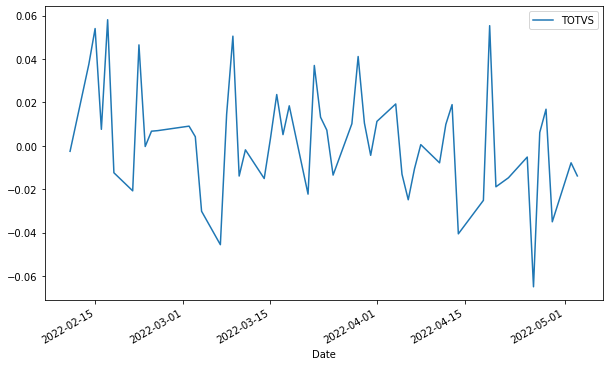

In [ ]:
retornos.plot(figsize=(10,6));

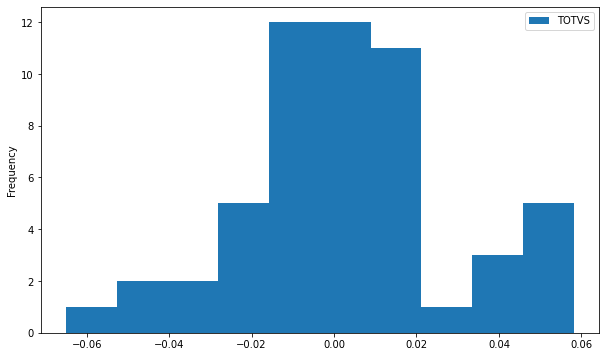

In [ ]:
retornos.plot.hist(figsize=(10,6));

Estatística descritiva

In [ ]:
retornos.describe()

,TOTVS
count,54.000000
mean,0.002582
std,0.025909
min,-0.064973
25%,-0.013775
50%,0.003816
75%,0.014181
max,0.058128


Assimetria e curtose

In [ ]:
# Cálculo da assimetria:
skew(retornos)

array([0.1292261])

In [ ]:
# Cálculo da curtose:
kurtosis(retornos)

array([0.1755699])

Testes "visuais" de normalidade

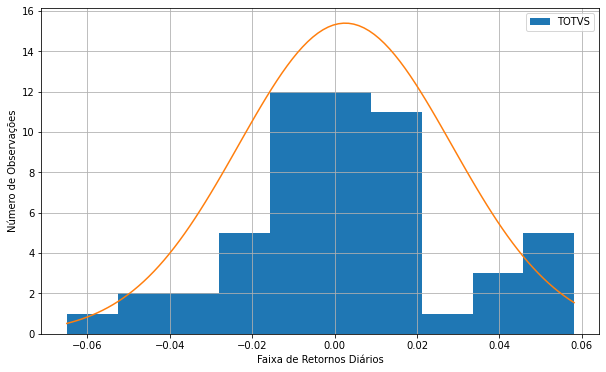

In [ ]:
# Histograma comparando com uma distribuição normal de mesma média e desvio padrão:
retornos.plot.hist(figsize=(10,6));
# parâmetros para curva normal
mediaR = retornos.mean()
desvpadR = retornos.std()
minR = retornos.min()
maxR = retornos.max()
x = np.linspace(minR,maxR,100)
plt.plot(x, stats.norm.pdf(x,mediaR,desvpadR))
plt.grid(True)
plt.xlabel('Faixa de Retornos Diários')
plt.ylabel('Número de Observações')
plt.show()

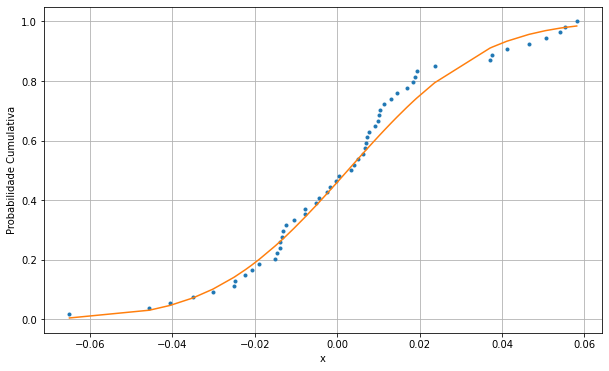

In [ ]:
# Distribuição cumulativa
plt.figure(figsize=(10,6))
x = retornos[nome].sort_values().values
y = np.arange(1, len(x)+1)/float(len(x))
mediaR = np.mean(x)
desvpadR = np.std(x)
y1 = stats.norm.cdf((x-mediaR)/desvpadR)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Probabilidade Cumulativa')
plt.show()

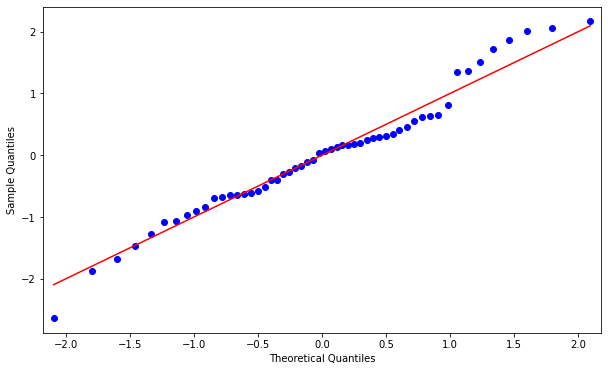

In [ ]:
# Q-Q Plot (linha de Henry)
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(retornos[nome].values, line='s', dist = stats.norm, fit = True, ax=ax)
plt.show()

Teste quantitativo de normalidade de Shapro-Wilk

In [ ]:
# Este teste tem como hipótese nula que a amostra possui uma distribuição normal. 
# Caso o valor p < 0.05 a hipótese nula é rejeitada significando que os dados da amostra não são normalmente distribuídos
shapirowilk = shapiro(retornos)
if shapirowilk[1] <= 0.05:
  print("Hipotese Nula Rejeitada")
else:
  print("Não rejeitar hipotese nula") #minha amostra possui uma distribuição normal

print('O valor-p calculado foi de', shapirowilk[1])

Não rejeitar hipotese nula
O valor-p calculado foi de 0.3480125069618225


## Estatística dos retornos da Ação 7 - SLC AGRICOLA





Preenchendo os dados da ação:

In [ ]:
ticker = 'SLCE3.SA' # É importante o ".SA" no final do código da ação
nome = 'SLC AGRICOLA'
data_inicial = '2018-07-01'
data_final = '2019-07-01'

Realizando o pré processamento

In [ ]:
acao = pdr.data.get_data_yahoo(ticker, start= data_inicial, end= data_final)
acao = acao.rename({"Close": nome}, axis=1)
acao = acao[[nome]]

Cálculo dos retornos

In [ ]:
retornos = acao.pct_change()
retornos = retornos.dropna()

Visualização dos dados

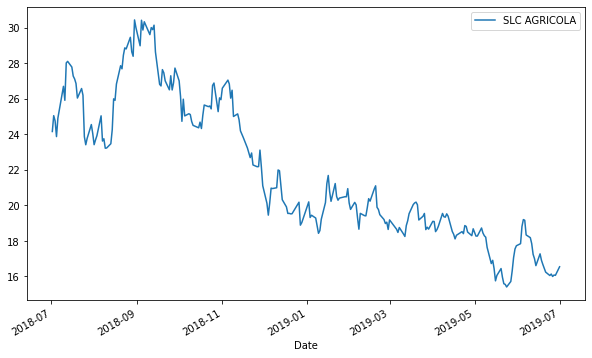

In [ ]:
acao.plot(figsize=(10,6));

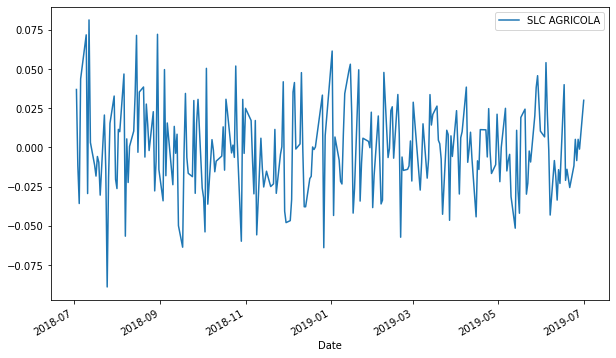

In [ ]:
retornos.plot(figsize=(10,6));

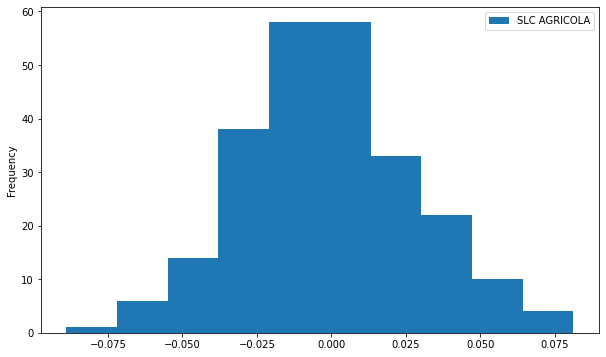

In [ ]:
retornos.plot.hist(figsize=(10,6));

Estatística descritiva

In [ ]:
retornos.describe()

,SLC AGRICOLA
count,244.000000
mean,-0.001148
std,0.028400
min,-0.089016
25%,-0.019701
50%,-0.002899
75%,0.017099
max,0.081228


Assimetria e curtose

In [ ]:
# Cálculo da assimetria:
skew(retornos)

array([0.14979924])

In [ ]:
# Cálculo da curtose:
kurtosis(retornos)

array([0.08059394])

Testes "visuais" de normalidade

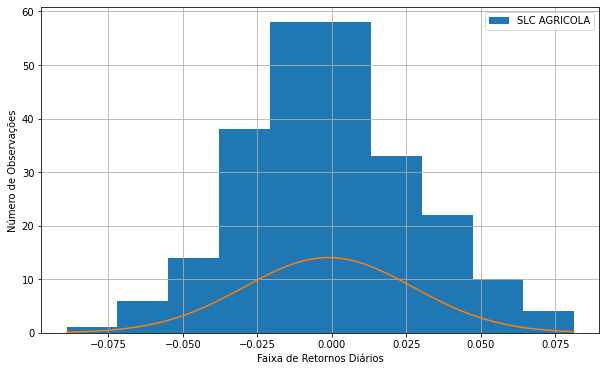

In [ ]:
# Histograma comparando com uma distribuição normal de mesma média e desvio padrão:
retornos.plot.hist(figsize=(10,6));
# parâmetros para curva normal
mediaR = retornos.mean()
desvpadR = retornos.std()
minR = retornos.min()
maxR = retornos.max()
x = np.linspace(minR,maxR,100)
plt.plot(x, stats.norm.pdf(x,mediaR,desvpadR))
plt.grid(True)
plt.xlabel('Faixa de Retornos Diários')
plt.ylabel('Número de Observações')
plt.show()

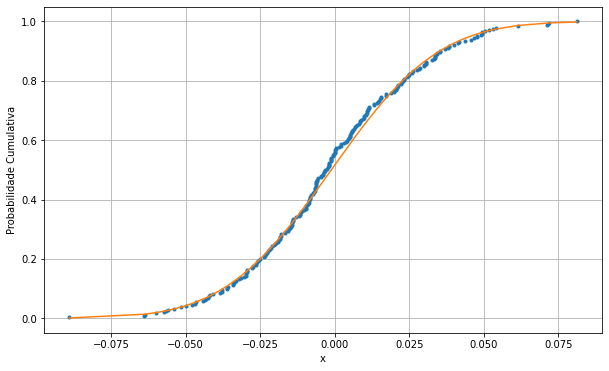

In [ ]:
# Distribuição cumulativa
plt.figure(figsize=(10,6))
x = retornos[nome].sort_values().values
y = np.arange(1, len(x)+1)/float(len(x))
mediaR = np.mean(x)
desvpadR = np.std(x)
y1 = stats.norm.cdf((x-mediaR)/desvpadR)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Probabilidade Cumulativa')
plt.show()

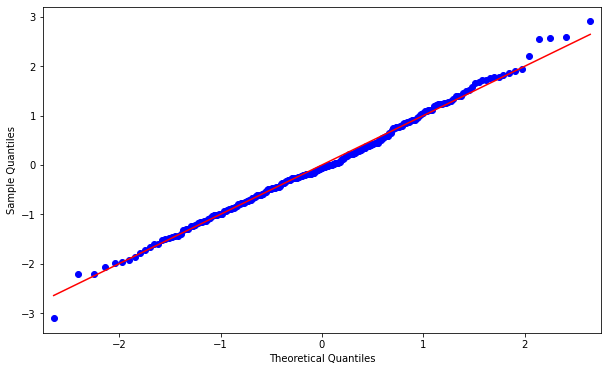

In [ ]:
# Q-Q Plot (linha de Henry)
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(retornos[nome].values, line='s', dist = stats.norm, fit = True, ax=ax)
plt.show()

Teste quantitativo de normalidade de Shapro-Wilk

In [ ]:
# Este teste tem como hipótese nula que a amostra possui uma distribuição normal. 
# Caso o valor p < 0.05 a hipótese nula é rejeitada significando que os dados da amostra não são normalmente distribuídos
shapirowilk = shapiro(retornos)
if shapirowilk[1] <= 0.05:
  print("Hipotese Nula Rejeitada")
else:
  print("Não rejeitar hipotese nula") #minha amostra possui uma distribuição normal

print('O valor-p calculado foi de', shapirowilk[1])

Não rejeitar hipotese nula
O valor-p calculado foi de 0.7288196086883545


## Estatística dos retornos da Ação 8 - EMBRAER





Preenchendo os dados da ação:

In [ ]:
ticker = 'EMBR3.SA' # É importante o ".SA" no final do código da ação
nome = 'EMBRAER'
data_inicial = '2022-03-15'
data_final = '2022-05-01'

Realizando o pré processamento

In [ ]:
acao = pdr.data.get_data_yahoo(ticker, start= data_inicial, end= data_final)
acao = acao.rename({"Close": nome}, axis=1)
acao = acao[[nome]]

Cálculo dos retornos

In [ ]:
retornos = acao.pct_change()
retornos = retornos.dropna()

Visualização dos dados

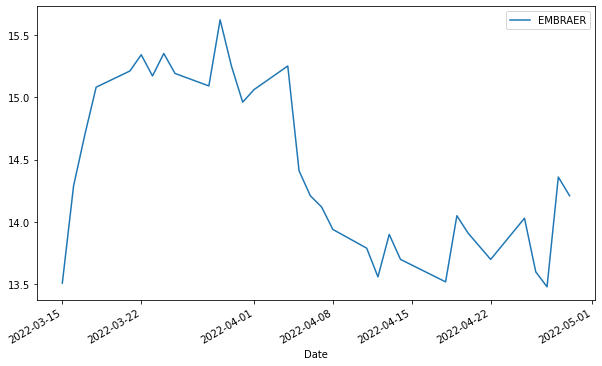

In [ ]:
acao.plot(figsize=(10,6));

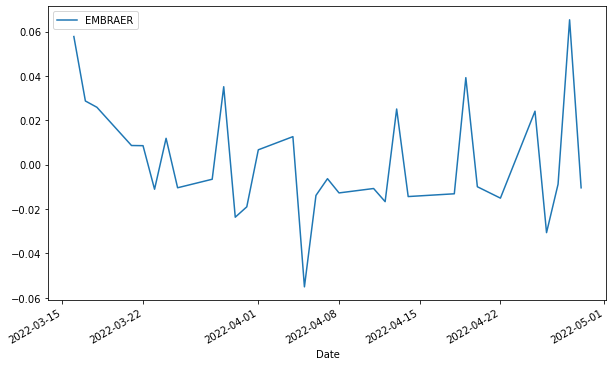

In [ ]:
retornos.plot(figsize=(10,6));

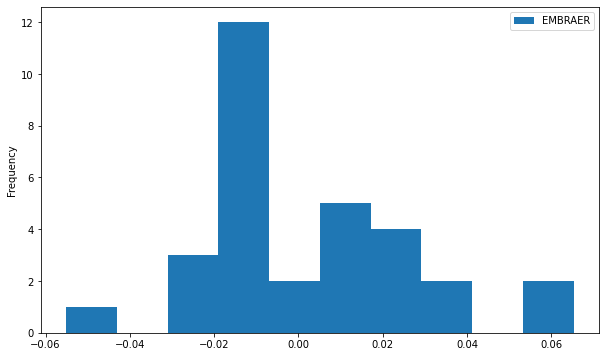

In [ ]:
retornos.plot.hist(figsize=(10,6));

Estatística descritiva

In [ ]:
retornos.describe()

,EMBRAER
count,31.000000
mean,0.001955
std,0.026008
min,-0.055082
25%,-0.013509
50%,-0.008824
75%,0.018352
max,0.065282


Assimetria e curtose

In [ ]:
# Cálculo da assimetria:
skew(retornos)

array([0.55781998])

In [ ]:
# Cálculo da curtose:
kurtosis(retornos)

array([0.25277029])

Testes "visuais" de normalidade

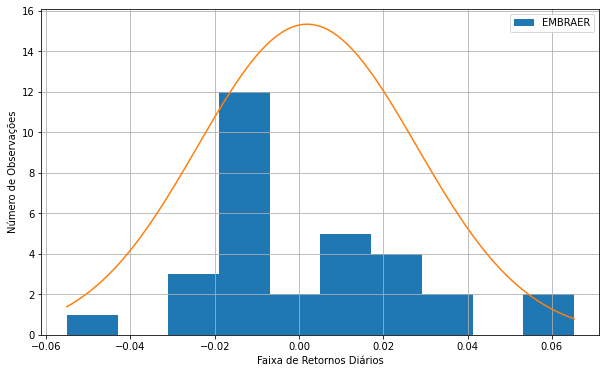

In [ ]:
# Histograma comparando com uma distribuição normal de mesma média e desvio padrão:
retornos.plot.hist(figsize=(10,6));
# parâmetros para curva normal
mediaR = retornos.mean()
desvpadR = retornos.std()
minR = retornos.min()
maxR = retornos.max()
x = np.linspace(minR,maxR,100)
plt.plot(x, stats.norm.pdf(x,mediaR,desvpadR))
plt.grid(True)
plt.xlabel('Faixa de Retornos Diários')
plt.ylabel('Número de Observações')
plt.show()

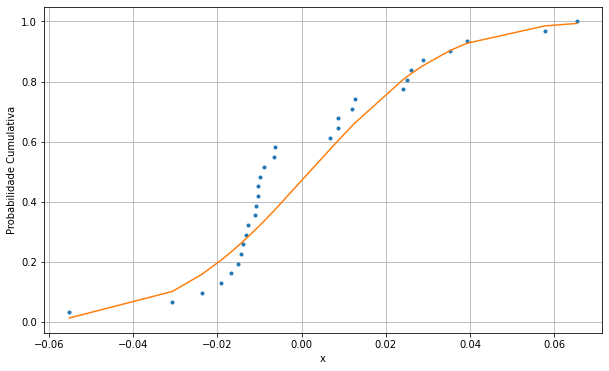

In [ ]:
# Distribuição cumulativa
plt.figure(figsize=(10,6))
x = retornos[nome].sort_values().values
y = np.arange(1, len(x)+1)/float(len(x))
mediaR = np.mean(x)
desvpadR = np.std(x)
y1 = stats.norm.cdf((x-mediaR)/desvpadR)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Probabilidade Cumulativa')
plt.show()

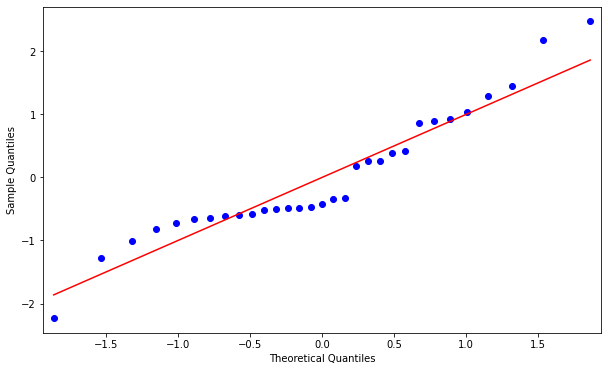

In [ ]:
# Q-Q Plot (linha de Henry)
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(retornos[nome].values, line='s', dist = stats.norm, fit = True, ax=ax)
plt.show()

Teste quantitativo de normalidade de Shapro-Wilk

In [ ]:
# Este teste tem como hipótese nula que a amostra possui uma distribuição normal. 
# Caso o valor p < 0.05 a hipótese nula é rejeitada significando que os dados da amostra não são normalmente distribuídos
shapirowilk = shapiro(retornos)
if shapirowilk[1] <= 0.05:
  print("Hipotese Nula Rejeitada")
else:
  print("Não rejeitar hipotese nula") #minha amostra possui uma distribuição normal

print('O valor-p calculado foi de', shapirowilk[1])

Não rejeitar hipotese nula
O valor-p calculado foi de 0.06264875084161758


## Estatística dos retornos da Ação 9 - BRASKEM





Preenchendo os dados da ação:

In [ ]:
ticker = 'BRKM5.SA' # É importante o ".SA" no final do código da ação
nome = 'BRASKEM'
data_inicial = '2022-01-01'
data_final = '2022-09-30'

Realizando o pré processamento

In [ ]:
acao = pdr.data.get_data_yahoo(ticker, start= data_inicial, end= data_final)
acao = acao.rename({"Close": nome}, axis=1)
acao = acao[[nome]]

Cálculo dos retornos

In [ ]:
retornos = acao.pct_change()
retornos = retornos.dropna()

Visualização dos dados

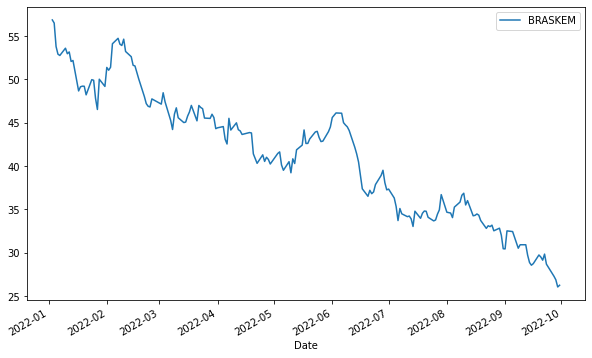

In [ ]:
acao.plot(figsize=(10,6));

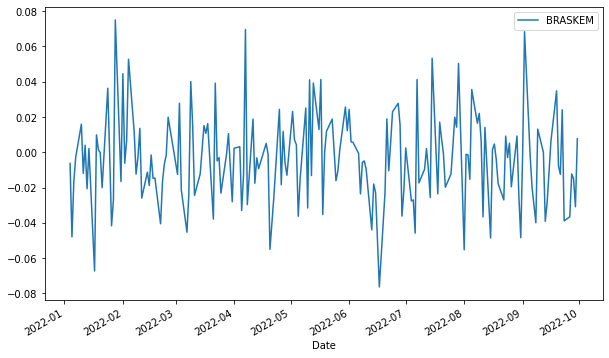

In [ ]:
retornos.plot(figsize=(10,6));

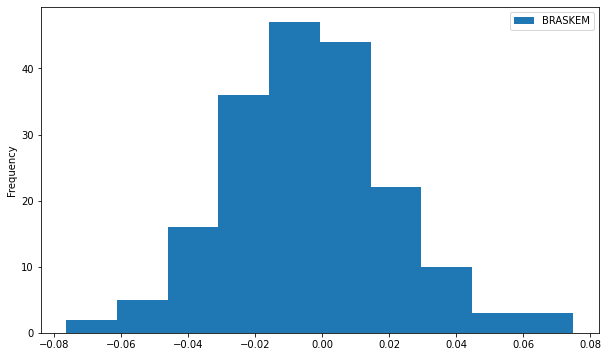

In [ ]:
retornos.plot.hist(figsize=(10,6));

Estatística descritiva

In [ ]:
retornos.describe()

,BRASKEM
count,188.000000
mean,-0.003787
std,0.025221
min,-0.076391
25%,-0.019894
50%,-0.003008
75%,0.010946
max,0.075038


Assimetria e curtose

In [ ]:
# Cálculo da assimetria:
skew(retornos)

array([0.28330848])

In [ ]:
# Cálculo da curtose:
kurtosis(retornos)

array([0.60395205])

Testes "visuais" de normalidade

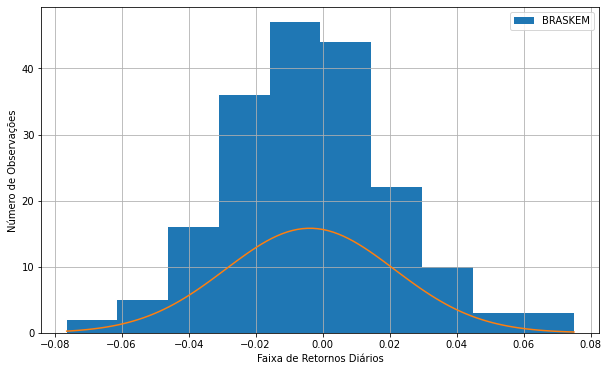

In [ ]:
# Histograma comparando com uma distribuição normal de mesma média e desvio padrão:
retornos.plot.hist(figsize=(10,6));
# parâmetros para curva normal
mediaR = retornos.mean()
desvpadR = retornos.std()
minR = retornos.min()
maxR = retornos.max()
x = np.linspace(minR,maxR,100)
plt.plot(x, stats.norm.pdf(x,mediaR,desvpadR))
plt.grid(True)
plt.xlabel('Faixa de Retornos Diários')
plt.ylabel('Número de Observações')
plt.show()

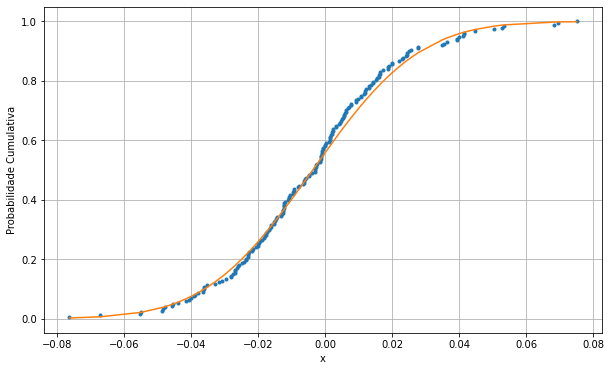

In [ ]:
# Distribuição cumulativa
plt.figure(figsize=(10,6))
x = retornos[nome].sort_values().values
y = np.arange(1, len(x)+1)/float(len(x))
mediaR = np.mean(x)
desvpadR = np.std(x)
y1 = stats.norm.cdf((x-mediaR)/desvpadR)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Probabilidade Cumulativa')
plt.show()

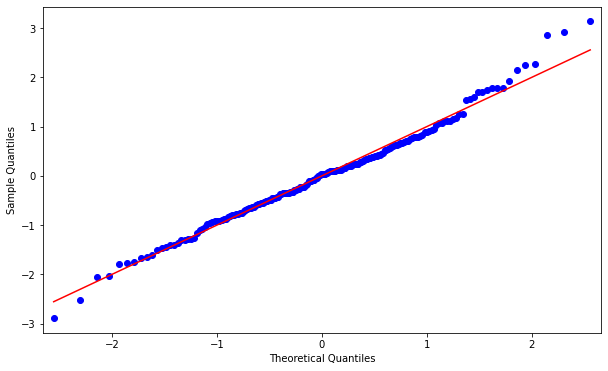

In [ ]:
# Q-Q Plot (linha de Henry)
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(retornos[nome].values, line='s', dist = stats.norm, fit = True, ax=ax)
plt.show()

Teste quantitativo de normalidade de Shapro-Wilk

In [ ]:
# Este teste tem como hipótese nula que a amostra possui uma distribuição normal. 
# Caso o valor p < 0.05 a hipótese nula é rejeitada significando que os dados da amostra não são normalmente distribuídos
shapirowilk = shapiro(retornos)
if shapirowilk[1] <= 0.05:
  print("Hipotese Nula Rejeitada")
else:
  print("Não rejeitar hipotese nula") #minha amostra possui uma distribuição normal

print('O valor-p calculado foi de', shapirowilk[1])

Não rejeitar hipotese nula
O valor-p calculado foi de 0.1777477264404297


## Estatística dos retornos da Ação 10 - GRUPO NATURA





Preenchendo os dados da ação:

In [ ]:
ticker = 'NTCO3.SA' # É importante o ".SA" no final do código da ação
nome = 'GRUPO NATURA'
data_inicial = '2022-05-01'
data_final = '2022-09-30'

Realizando o pré processamento

In [ ]:
acao = pdr.data.get_data_yahoo(ticker, start= data_inicial, end= data_final)
acao = acao.rename({"Close": nome}, axis=1)
acao = acao[[nome]]

Cálculo dos retornos

In [ ]:
retornos = acao.pct_change()
retornos = retornos.dropna()

Visualização dos dados

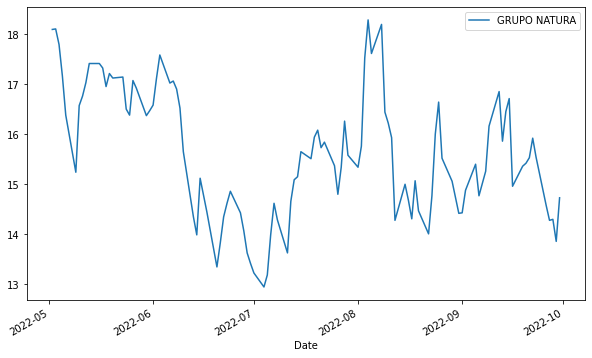

In [ ]:
acao.plot(figsize=(10,6));

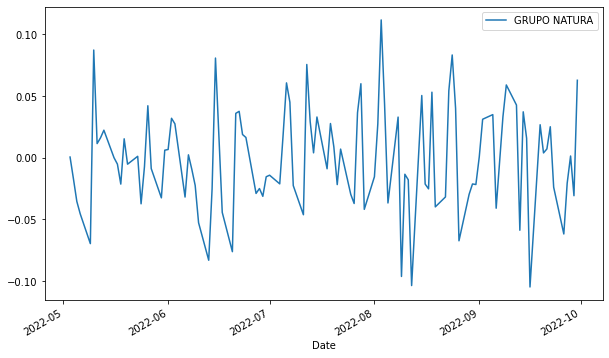

In [ ]:
retornos.plot(figsize=(10,6));

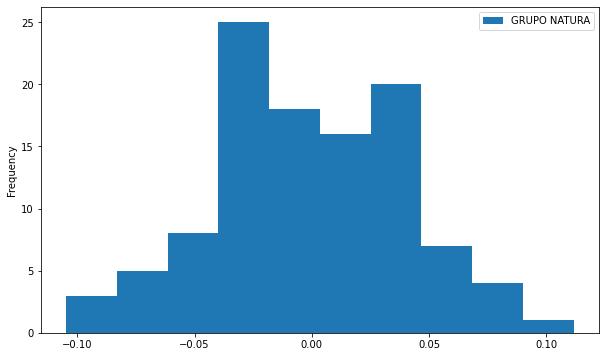

In [ ]:
retornos.plot.hist(figsize=(10,6));

Estatística descritiva

In [ ]:
retornos.describe()

,GRUPO NATURA
count,107.000000
mean,-0.001047
std,0.041884
min,-0.104728
25%,-0.029288
50%,0.000000
75%,0.030258
max,0.111675


Assimetria e curtose

In [ ]:
# Cálculo da assimetria:
skew(retornos)

array([-0.00113115])

In [ ]:
# Cálculo da curtose:
kurtosis(retornos)

array([-0.00523815])

Testes "visuais" de normalidade

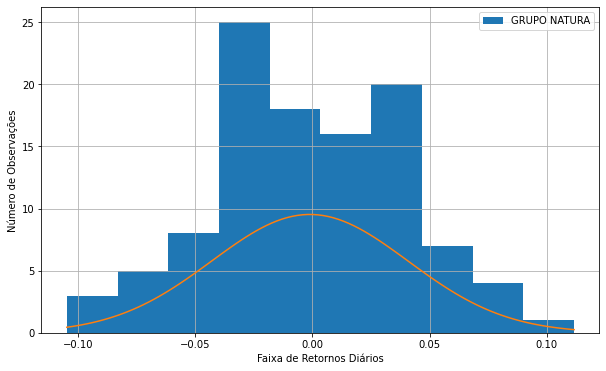

In [ ]:
# Histograma comparando com uma distribuição normal de mesma média e desvio padrão:
retornos.plot.hist(figsize=(10,6));
# parâmetros para curva normal
mediaR = retornos.mean()
desvpadR = retornos.std()
minR = retornos.min()
maxR = retornos.max()
x = np.linspace(minR,maxR,100)
plt.plot(x, stats.norm.pdf(x,mediaR,desvpadR))
plt.grid(True)
plt.xlabel('Faixa de Retornos Diários')
plt.ylabel('Número de Observações')
plt.show()

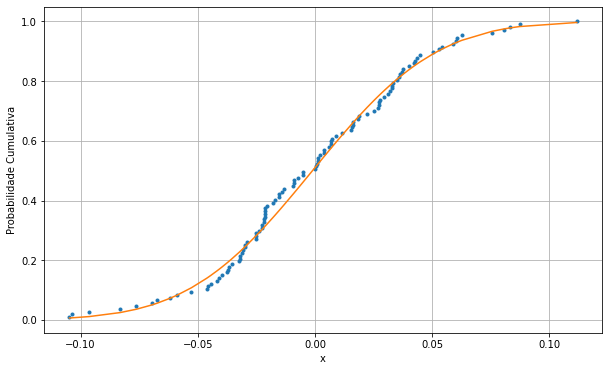

In [ ]:
# Distribuição cumulativa
plt.figure(figsize=(10,6))
x = retornos[nome].sort_values().values
y = np.arange(1, len(x)+1)/float(len(x))
mediaR = np.mean(x)
desvpadR = np.std(x)
y1 = stats.norm.cdf((x-mediaR)/desvpadR)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Probabilidade Cumulativa')
plt.show()

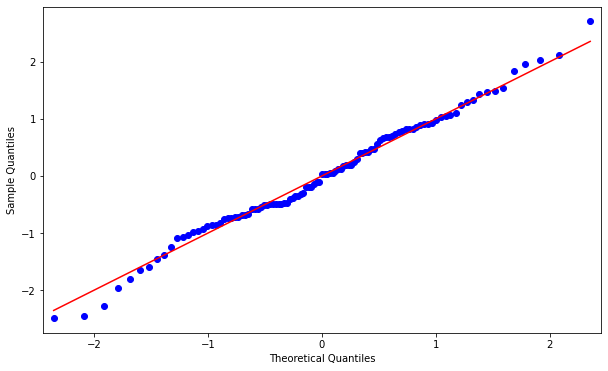

In [ ]:
# Q-Q Plot (linha de Henry)
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(retornos[nome].values, line='s', dist = stats.norm, fit = True, ax=ax)
plt.show()

Teste quantitativo de normalidade de Shapro-Wilk

In [ ]:
# Este teste tem como hipótese nula que a amostra possui uma distribuição normal. 
# Caso o valor p < 0.05 a hipótese nula é rejeitada significando que os dados da amostra não são normalmente distribuídos
shapirowilk = shapiro(retornos)
if shapirowilk[1] <= 0.05:
  print("Hipotese Nula Rejeitada")
else:
  print("Não rejeitar hipotese nula") #minha amostra possui uma distribuição normal

print('O valor-p calculado foi de', shapirowilk[1])

Não rejeitar hipotese nula
O valor-p calculado foi de 0.7439289093017578
